### DataCamp Certification Case Study

Project Brief

Tasty Bytes , an online recipe startup, has hired you as a data scientist. The website features new recipes on the homepage every day. The owner has told you that on days that they feature a popular recipe, traffic increases by as much as 40%. However, it is difficult to predict in advance which recipes will be popular or not.

The data team has collected data from previously published recipes. The owner wants to know whether you can use this information to predict whether a recipe will be popular (or in other words, receive a high score). She is especially interested in preventing unpopular (low-scoring) recipes from appearing on the homepage. She estimates that of all unpopular recipes, they currently correctly categorize 75% of them as being unpopular. She wants to know how your solution would compare to this guessing approach.

You will need to present your findings in two formats:

You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why.
You will then need to share your findings with the owner in a 10 minute presentation. The owner has no data science background but is familiar with basic data related terminology.
The data you will use for this analysis can be accessed here: "data/recipes.csv"

#**1. MOUNT DRIVE AND IMPORT LIBRARY**

In [1]:
# Import Library
import numpy
import copy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Import Library
import numpy
import copy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#**2. DATA LOADING AND OVERVIEW**

In [2]:
dataFrame = read_csv('recipes.csv')

In [3]:
dataFrame.shape

(43092, 10)

In [4]:
dataFrame.head()

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeId             43092 non-null  int64  
 1   Name                 43092 non-null  object 
 2   RecipeCategory       43052 non-null  object 
 3   Calories             43092 non-null  float64
 4   CholesterolContent   43092 non-null  float64
 5   CarbohydrateContent  43092 non-null  float64
 6   SugarContent         43092 non-null  float64
 7   ProteinContent       43092 non-null  float64
 8   RecipeServings       43092 non-null  float64
 9   HighScore            43092 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


In [6]:
dataFrame.describe()

,RecipeId,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
count,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000
mean,224707.928154,353.297587,69.475757,32.844187,12.206600,15.773125,9.517521,0.645735
std,141980.914350,405.065683,112.422309,46.428258,28.304371,21.588594,224.022873,0.478296
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,102616.750000,164.800000,4.500000,11.600000,2.200000,3.400000,4.000000,0.000000
50%,212333.000000,284.100000,40.700000,25.400000,5.500000,8.800000,6.000000,1.000000
75%,336736.250000,446.725000,95.900000,43.400000,14.100000,24.300000,8.000000,1.000000
max,540876.000000,30933.400000,9167.200000,3564.400000,2566.800000,1420.800000,32767.000000,1.000000


**I think id column won't effect to results, so i will delete it!!!**

In [7]:
dataFrame = dataFrame.drop(['RecipeId', 'Name'], axis=1)
dataFrame.head()

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0


In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeCategory       43052 non-null  object 
 1   Calories             43092 non-null  float64
 2   CholesterolContent   43092 non-null  float64
 3   CarbohydrateContent  43092 non-null  float64
 4   SugarContent         43092 non-null  float64
 5   ProteinContent       43092 non-null  float64
 6   RecipeServings       43092 non-null  float64
 7   HighScore            43092 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.6+ MB


In [9]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in dataFrame:
    # Compare if the dtype is object
    if dataFrame[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        dataFrame[col]=le.fit_transform(dataFrame[col]) 

In [10]:
dataFrame

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,144,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,24,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,63,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,0,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,185,261.6,103.6,20.9,0.2,6.7,15.0,1.0
...,...,...,...,...,...,...,...,...
43087,125,281.5,111.3,13.2,11.1,25.3,6.0,1.0
43088,110,697.2,242.1,3.8,1.9,72.9,4.0,0.0
43089,65,94.5,0.0,22.7,19.1,2.0,14.0,1.0
43090,42,207.1,72.6,20.1,12.7,24.9,4.0,1.0


In [11]:
dataFrame["HighScore"] = dataFrame["HighScore"].apply(lambda x: 1 if x == 1.0 else 0)
dataFrame

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,144,699.8,137.3,46.1,1.4,20.9,6.0,1
1,24,297.1,191.8,11.7,0.7,12.2,8.0,1
2,63,131.9,23.3,10.3,4.4,9.1,6.0,0
3,0,203.0,74.8,1.5,0.6,23.3,4.0,1
4,185,261.6,103.6,20.9,0.2,6.7,15.0,1
...,...,...,...,...,...,...,...,...
43087,125,281.5,111.3,13.2,11.1,25.3,6.0,1
43088,110,697.2,242.1,3.8,1.9,72.9,4.0,0
43089,65,94.5,0.0,22.7,19.1,2.0,14.0,1
43090,42,207.1,72.6,20.1,12.7,24.9,4.0,1


In [12]:
dataFrame

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,144,699.8,137.3,46.1,1.4,20.9,6.0,1
1,24,297.1,191.8,11.7,0.7,12.2,8.0,1
2,63,131.9,23.3,10.3,4.4,9.1,6.0,0
3,0,203.0,74.8,1.5,0.6,23.3,4.0,1
4,185,261.6,103.6,20.9,0.2,6.7,15.0,1
...,...,...,...,...,...,...,...,...
43087,125,281.5,111.3,13.2,11.1,25.3,6.0,1
43088,110,697.2,242.1,3.8,1.9,72.9,4.0,0
43089,65,94.5,0.0,22.7,19.1,2.0,14.0,1
43090,42,207.1,72.6,20.1,12.7,24.9,4.0,1


<function matplotlib.pyplot.show(close=None, block=None)>

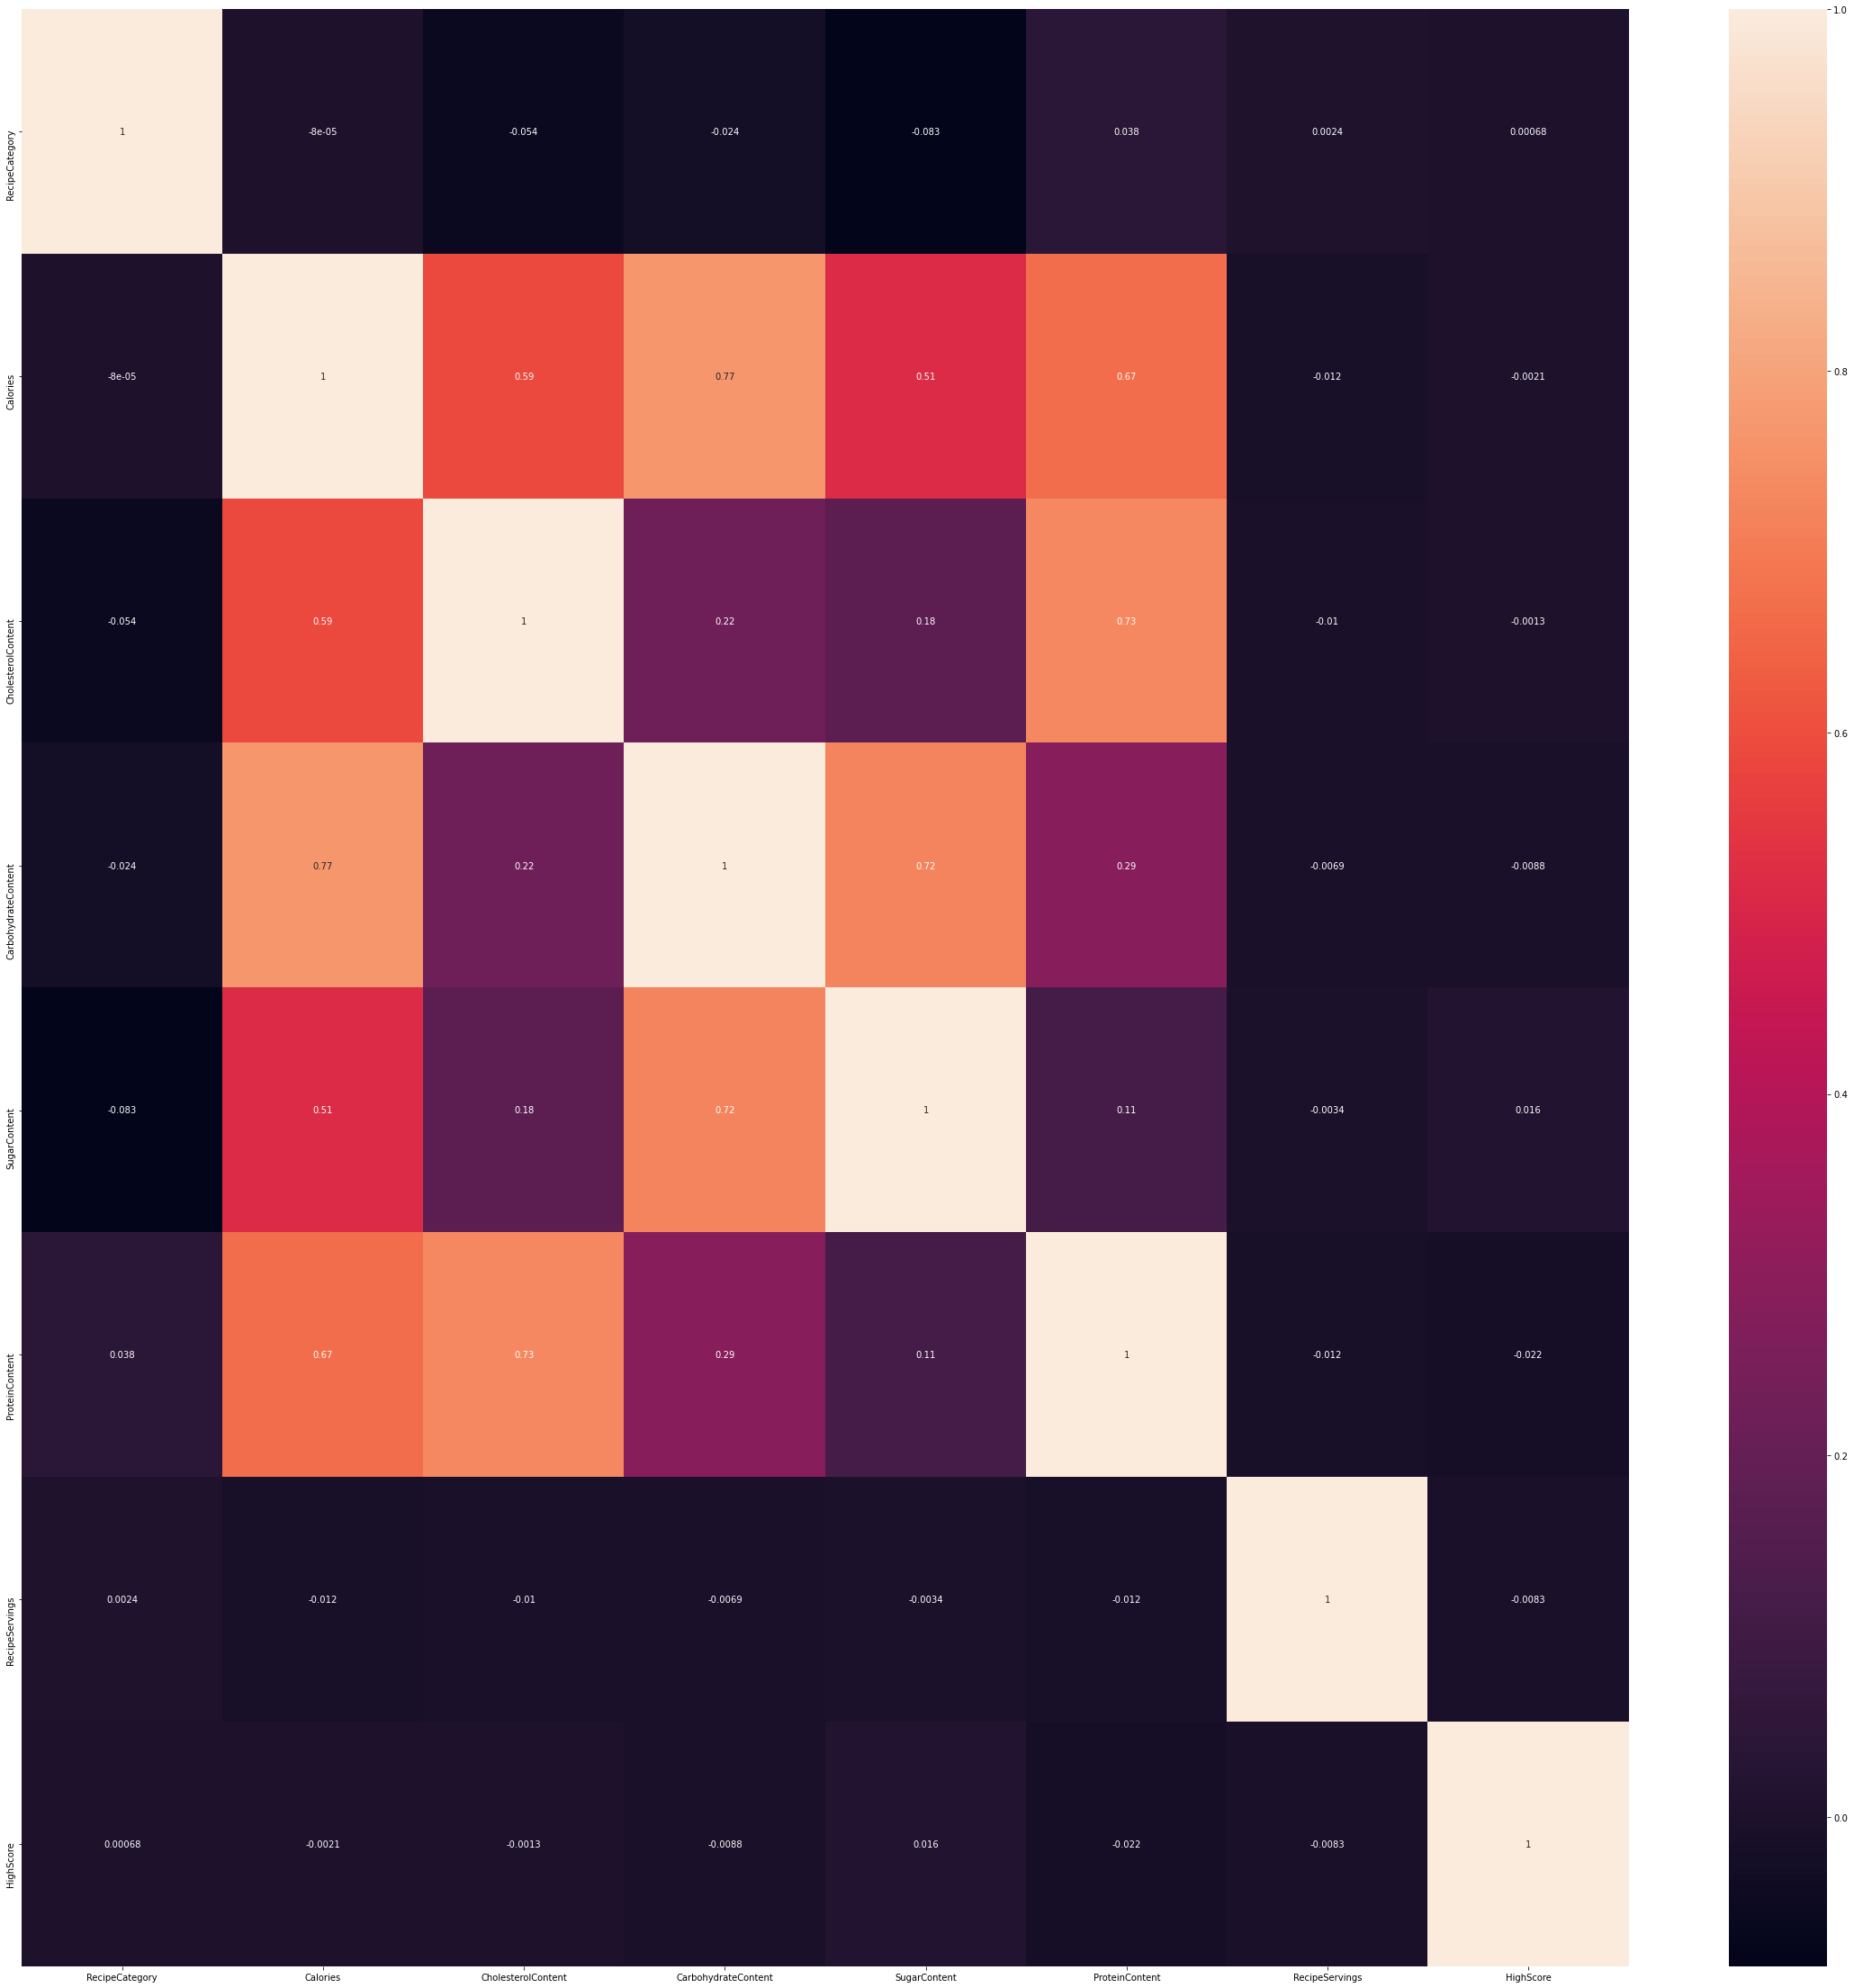

In [13]:
# Correlation

plt.figure(figsize=(40, 40))
sns.heatmap(dataFrame.corr(), annot = True)
plt.show

In [14]:
dataFrame.corr()['HighScore'].sort_values()

ProteinContent        -0.021633
CarbohydrateContent   -0.008793
RecipeServings        -0.008314
Calories              -0.002093
CholesterolContent    -0.001338
RecipeCategory         0.000680
SugarContent           0.016148
HighScore              1.000000
Name: HighScore, dtype: float64

array([[<AxesSubplot:title={'center':'RecipeCategory'}>,
        <AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'CholesterolContent'}>],
       [<AxesSubplot:title={'center':'CarbohydrateContent'}>,
        <AxesSubplot:title={'center':'SugarContent'}>,
        <AxesSubplot:title={'center':'ProteinContent'}>],
       [<AxesSubplot:title={'center':'RecipeServings'}>,
        <AxesSubplot:title={'center':'HighScore'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 2160x2160 with 0 Axes>

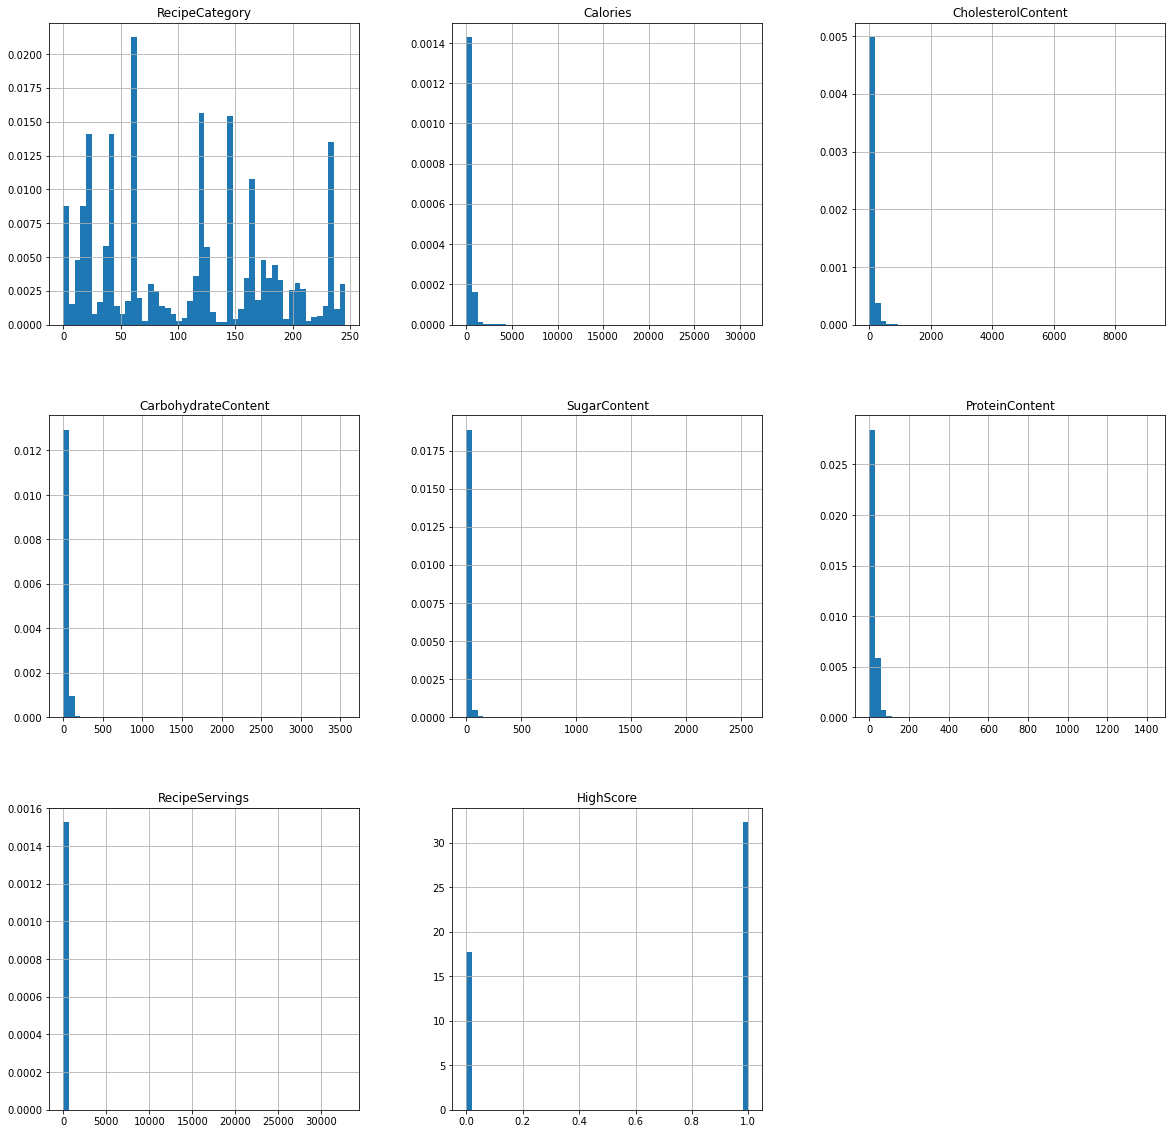

In [15]:
# Histogram
plt.figure(figsize = (30, 30))
dataFrame.hist(bins = 50, figsize = (20, 20), density = 1)

<Figure size 2160x1440 with 0 Axes>

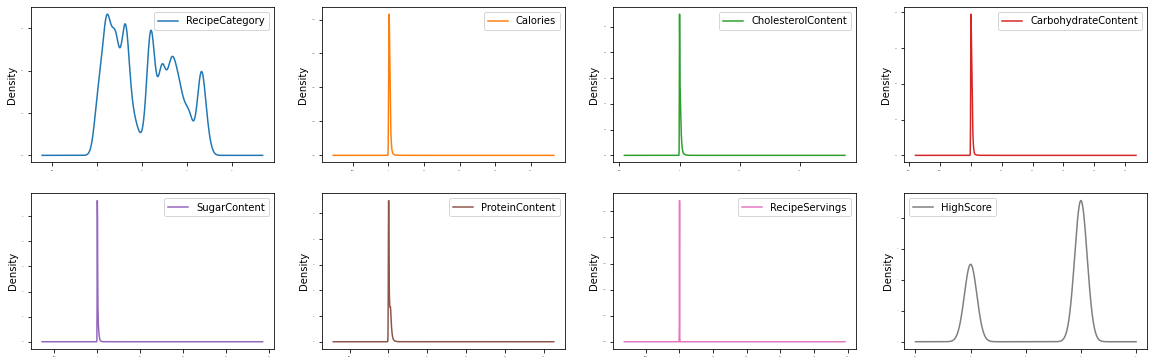

In [16]:
# Density plot
plt.figure(figsize = (30, 20))
dataFrame.plot(kind= 'density', subplots=True, layout=(6,4), sharex = False, fontsize=1, figsize = (20, 20))
plt.show()

<Figure size 1800x1800 with 0 Axes>

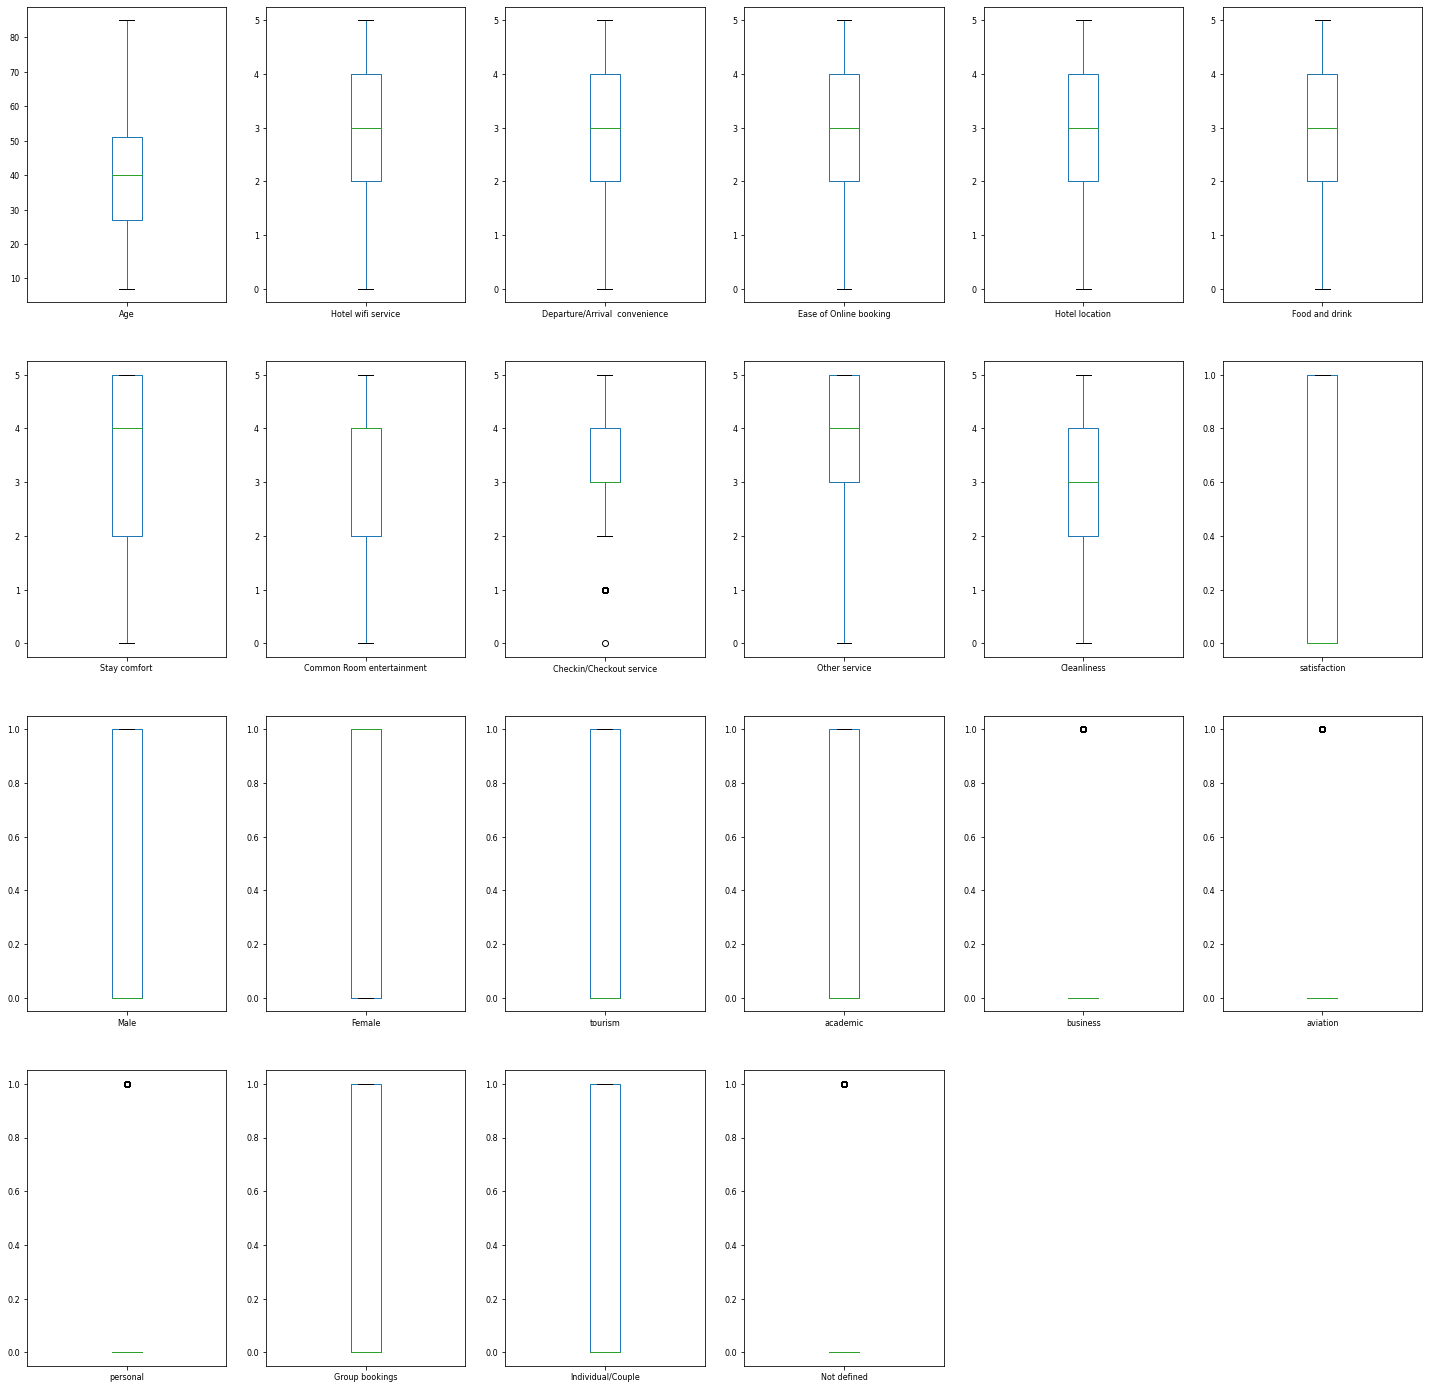

In [17]:
# Box plot
plt.figure(figsize = (25, 25))
dataFrame.plot(kind='box', subplots=True, layout=(4, 6), sharex=False, sharey=False, fontsize=8, figsize = (25, 25))
plt.show()

In [17]:
X = dataFrame.drop(["HighScore"], axis = 1)
Y = dataFrame["HighScore"]
Y.value_counts()

1    27826
0    15266
Name: HighScore, dtype: int64

In [18]:
X

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings
0,144,699.8,137.3,46.1,1.4,20.9,6.0
1,24,297.1,191.8,11.7,0.7,12.2,8.0
2,63,131.9,23.3,10.3,4.4,9.1,6.0
3,0,203.0,74.8,1.5,0.6,23.3,4.0
4,185,261.6,103.6,20.9,0.2,6.7,15.0
...,...,...,...,...,...,...,...
43087,125,281.5,111.3,13.2,11.1,25.3,6.0
43088,110,697.2,242.1,3.8,1.9,72.9,4.0
43089,65,94.5,0.0,22.7,19.1,2.0,14.0
43090,42,207.1,72.6,20.1,12.7,24.9,4.0


In [19]:
Y

0        1
1        1
2        0
3        1
4        1
        ..
43087    1
43088    0
43089    1
43090    1
43091    1
Name: HighScore, Length: 43092, dtype: int64

In [20]:
dataFrame.shape

(43092, 8)

In [21]:
# Divide dataFrame into 2 datasets: train and validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((34473, 7), (8619, 7))

Accuracy is:  0.6447383687202691
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      3062
           1       0.64      1.00      0.78      5557

    accuracy                           0.64      8619
   macro avg       0.57      0.50      0.39      8619
weighted avg       0.59      0.64      0.51      8619



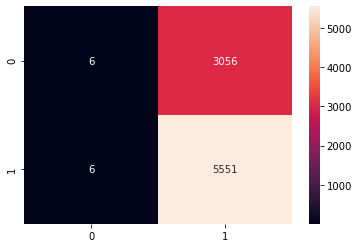

In [22]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

y_pred = lr.predict(X_test)
ac = accuracy_score(Y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(Y_test, y_pred))

Accuracy is:  0.6448543914607263
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3062
           1       0.64      1.00      0.78      5557

    accuracy                           0.64      8619
   macro avg       0.82      0.50      0.39      8619
weighted avg       0.77      0.64      0.51      8619



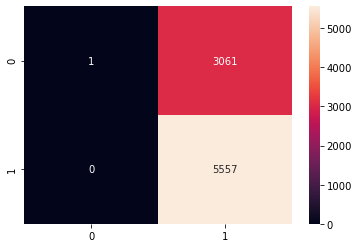

In [23]:

svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

y_pred = svc.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(Y_test, y_pred))

Accuracy is:  0.6435781413156979
              precision    recall  f1-score   support

           0       0.27      0.00      0.00      3062
           1       0.64      1.00      0.78      5557

    accuracy                           0.64      8619
   macro avg       0.46      0.50      0.39      8619
weighted avg       0.51      0.64      0.51      8619



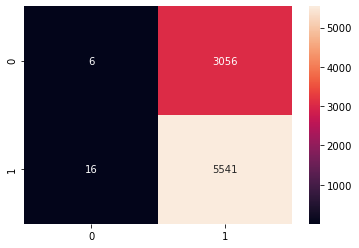

In [24]:
#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets 
nb.fit(X_train, Y_train)

#Predict Score 
y_pred = nb.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(Y_test, y_pred))

Accuracy is:  0.6219979115906717
              precision    recall  f1-score   support

           0       0.40      0.13      0.20      3062
           1       0.65      0.89      0.75      5557

    accuracy                           0.62      8619
   macro avg       0.53      0.51      0.47      8619
weighted avg       0.56      0.62      0.55      8619



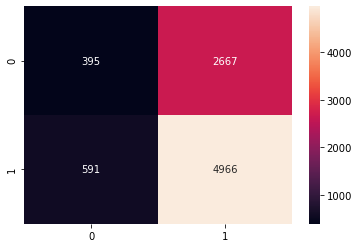

In [25]:
rf = RandomForestClassifier(random_state=42)
# Train the model using the training sets 
rf.fit(X_train, Y_train)

#Predict Score 
y_pred = rf.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(Y_test, y_pred))

In [26]:
Q1 = dataFrame.quantile(0.25)
Q3 = dataFrame.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RecipeCategory         126.000
Calories               281.925
CholesterolContent      91.400
CarbohydrateContent     31.800
SugarContent            11.900
ProteinContent          20.900
RecipeServings           4.000
HighScore                1.000
dtype: float64


In [27]:
recipe = dataFrame[~((dataFrame < (Q1 - 1.5 * IQR)) |(dataFrame > (Q3 + 1.5 * IQR))).any(axis=1)]
recipe.shape

(31616, 8)

In [28]:
recipe.corr()['HighScore'].sort_values()

CarbohydrateContent   -0.040690
ProteinContent        -0.035312
Calories              -0.012116
CholesterolContent    -0.008577
RecipeServings        -0.003672
RecipeCategory         0.000876
SugarContent           0.016537
HighScore              1.000000
Name: HighScore, dtype: float64

In [29]:
recipe.head()

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,144,699.8,137.3,46.1,1.4,20.9,6.0,1
1,24,297.1,191.8,11.7,0.7,12.2,8.0,1
2,63,131.9,23.3,10.3,4.4,9.1,6.0,0
3,0,203.0,74.8,1.5,0.6,23.3,4.0,1
5,191,313.4,42.7,42.1,17.0,11.7,2.0,1


In [30]:
X = recipe.drop(["HighScore"], axis = 1)
Y = recipe["HighScore"]
Y.value_counts()

1    20165
0    11451
Name: HighScore, dtype: int64

In [31]:
X

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings
0,144,699.8,137.3,46.1,1.4,20.9,6.0
1,24,297.1,191.8,11.7,0.7,12.2,8.0
2,63,131.9,23.3,10.3,4.4,9.1,6.0
3,0,203.0,74.8,1.5,0.6,23.3,4.0
5,191,313.4,42.7,42.1,17.0,11.7,2.0
...,...,...,...,...,...,...,...
43086,19,280.5,0.0,0.1,0.1,0.0,2.0
43087,125,281.5,111.3,13.2,11.1,25.3,6.0
43089,65,94.5,0.0,22.7,19.1,2.0,14.0
43090,42,207.1,72.6,20.1,12.7,24.9,4.0


In [32]:
# declare variable
seed = 7
scoring = 'accuracy'

In [33]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LGR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))
models.append(('RDF', RandomForestClassifier()))


In [34]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

DTC: 0.546776 (0.003879)
LGR: 0.645752 (0.000327)
NB: 0.607260 (0.075498)
RDF: 0.619238 (0.005044)


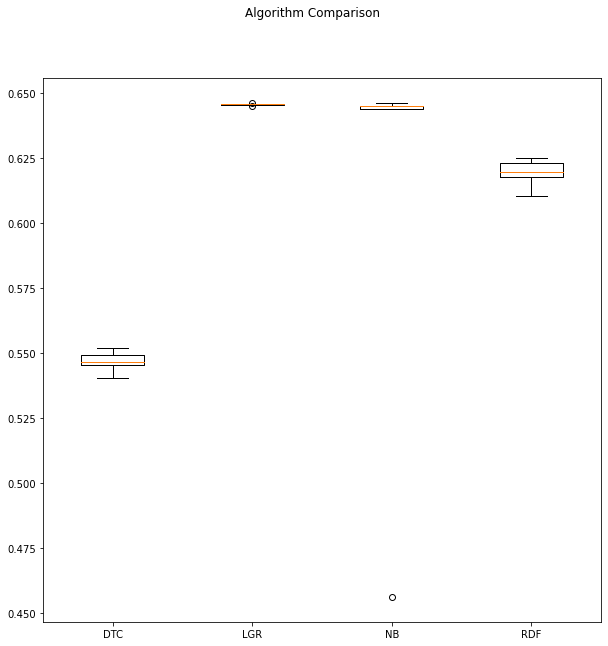

In [35]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledLGR', Pipeline([('Scaler', StandardScaler()),('LGR', LogisticRegression(solver='liblinear', multi_class='ovr'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRDF', Pipeline([('Scaler', StandardScaler()),('RDF', RandomForestClassifier())])))


results = []
names = []
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledDTC: 0.545296 (0.001018)
ScaledLGR: 0.645723 (0.000330)
ScaledNB: 0.607260 (0.075498)
ScaledRDF: 0.620950 (0.002358)


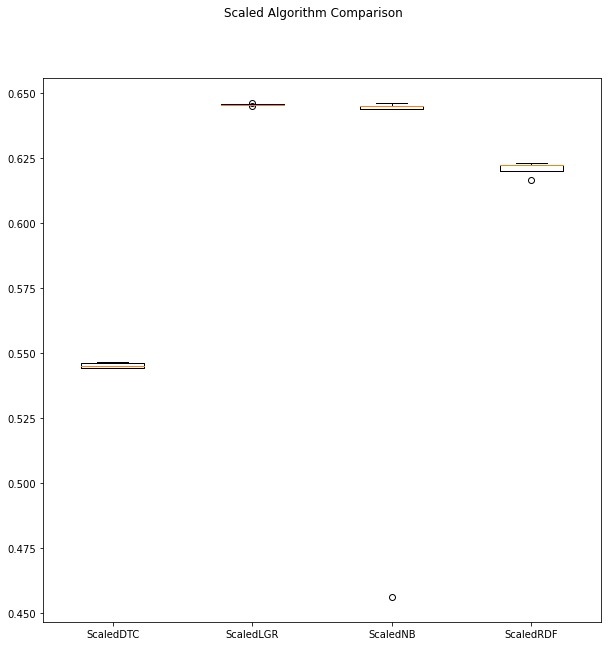

In [37]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [38]:
# ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
# bagging
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.645607 (0.000327)
ScaledGBM: 0.645172 (0.000417)
ScaledET: 0.614481 (0.004504)


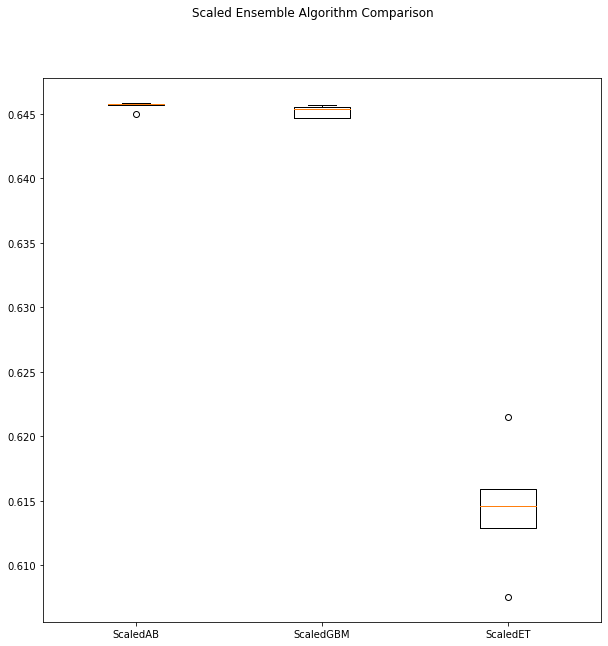

In [39]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [40]:
# Scaled RandomForestClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([100,300,500,700,900]))
model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.624866 using {'n_estimators': 900}
0.621240 (0.005154) with: {'n_estimators': 100}
0.623444 (0.003771) with: {'n_estimators': 300}
0.623619 (0.003821) with: {'n_estimators': 500}
0.623793 (0.004559) with: {'n_estimators': 700}
0.624866 (0.004504) with: {'n_estimators': 900}


In [41]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed, n_estimators=900)
model.fit(rescaledX, Y_train)

RandomForestClassifier(n_estimators=900, random_state=7)

In [42]:
rescaledX = scaler.fit_transform(X_test)
predictions = model.predict(rescaledX)
print("Classification_report")
print(classification_report(Y_test, predictions))
print("Confusion matrix: ")
print(confusion_matrix(Y_test, predictions))

Classification_report
              precision    recall  f1-score   support

           0       0.42      0.12      0.19      3062
           1       0.65      0.91      0.76      5557

    accuracy                           0.63      8619
   macro avg       0.54      0.51      0.47      8619
weighted avg       0.57      0.63      0.56      8619

Confusion matrix: 
[[ 379 2683]
 [ 526 5031]]


**GOOD RESULT!!!**

#**6. CONCLUSION**

- Through this project, we can know the main factors affecting satisfaction, thereby making reasonable adjustments to increase business efficiency.
- Sometimes retaining some features with a low correlation coefficient compared to the output results in better model results.